# Matrices de Correlación de los Datos
Este notebook tiene como objetico mostrar las relaciones que tienen las variables entre sí. Esta relación va a ser mostrada mediante una matriz de correlaciones en donde pueden existir proporcionalidades directas, inversas o nulas en cierto grado.

## Importaciones

In [ ]:
from google.colab import drive
from os import listdir
from os.path import isfile, join
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

## Obtención de Datos

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_datos_dir = 'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/DATOS'
dataset_images_dir = 'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/IMAGES_FOLDER'

dataset_datos_files = [dataset_datos_dir+'/'+filename for filename in listdir(dataset_datos_dir) if isfile(join(dataset_datos_dir, filename))]

In [ ]:
datos_wn_05 = []
datos_wn_1 = []
datos_wn_2 = []
datos_wn_3 = []

for filename in listdir(dataset_datos_dir):
  if isfile(join(dataset_datos_dir, filename)):
    nombre_archivo = filename.split('.')[0]
    if (nombre_archivo.split('_')[2] == '05A'):
      datos_wn_05.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '1A'):
      datos_wn_1.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '2A'):
      datos_wn_2.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '3A'):
      datos_wn_3.append(dataset_datos_dir + '/' + filename)

In [ ]:
def separar_por_estado(arreglo):

  estado_1 = []
  estado_2 = []
  estado_3 = []
  estado_4 = []

  for direccion in arreglo:
    nombre_archivo = direccion.split('/')[4].split('.')[0]
    estado = nombre_archivo.split('_')[0]
    if (estado == '1'):
      estado_1.append(direccion)
    elif (estado == '2'):
      estado_2.append(direccion)
    elif (estado == '3'):
      estado_3.append(direccion)
    elif (estado == '4'):
      estado_4.append(direccion)

  return {1: estado_1, 2: estado_2, 3: estado_3, 4: estado_4}

In [ ]:
datos_wn_05_estados = separar_por_estado(datos_wn_05)
datos_wn_1_estados = separar_por_estado(datos_wn_1)
datos_wn_2_estados = separar_por_estado(datos_wn_2)
datos_wn_3_estados = separar_por_estado(datos_wn_3)

diccionario_datos = {
                     'wn_05': datos_wn_05_estados,
                     'wn_1': datos_wn_1_estados,
                     'wn_2': datos_wn_2_estados,
                     'wn_3': datos_wn_3_estados 
                    }

## Matrices de Correlación
Se mostrarán gráficas representando diferentes relaciones entre variables.

In [ ]:
font_title = {'family': 'monospace',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

font_label = {'family': 'monospace',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }

In [ ]:
def configurar_datos_correlacion_individual(conjunto_wn):

  """
  Función que retorna un conjunto promediado de datos de longitud
  4 de acuerdo a los estados existentes.
  """

  conjunto = []
  estados = conjunto_wn.keys()

  for estado in estados:
    matriz = 0
    cantidad = 0
    arreglo = conjunto_wn[estado]
    for direccion in arreglo:
      mat = loadmat(direccion)
      df = pd.DataFrame(mat['data'])
      matriz = matriz + df
      cantidad = cantidad + 1
    matriz = matriz/cantidad
    conjunto.append(matriz)

  return conjunto

In [ ]:
wn05_configurado_corr_ind = configurar_datos_correlacion_individual(diccionario_datos['wn_05'])
wn1_configurado_corr_ind = configurar_datos_correlacion_individual(diccionario_datos['wn_1'])
wn2_configurado_corr_ind = configurar_datos_correlacion_individual(diccionario_datos['wn_2'])
wn3_configurado_corr_ind = configurar_datos_correlacion_individual(diccionario_datos['wn_3'])

In [ ]:
arreglo_corr_grupal = [wn05_configurado_corr_ind, wn1_configurado_corr_ind, wn2_configurado_corr_ind, wn3_configurado_corr_ind]

In [ ]:
def graficar_corr_grupal(arreglo, 
                         suptitle, 
                         estado,
                         font_title, 
                         cmap):
  
  """
  Función que grafica 4 matrices de correlación que pertenecen a
  cierto nivel de wn. Las 4 matrices poseen los valores de los 
  sensores que se encuentran en un estado determinado.
  """

  plt.figure(figsize=[14, 10])
  plt.suptitle(suptitle, fontdict=font_title, fontsize=20)
  plt.tight_layout(pad=5)
  plt.subplot(2,2,1)
  plt.title('White Noise = 0.5', fontdict=font_title)
  mask = np.triu(np.ones_like(arreglo[0][estado-1].corr(), dtype=bool))
  ax = sns.heatmap(arreglo[0][estado-1].corr(),
                  mask=mask,
                  #annot=True,
                  linewidth=0.5,
                  #fmt='.2f',
                  cmap=cmap,
                  cbar=False)

  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)
  plt.subplot(2,2,2)
  plt.title('White Noise = 1', fontdict=font_title)
  mask = np.triu(np.ones_like(arreglo[1][estado-1].corr(), dtype=bool))
  ax = sns.heatmap(arreglo[1][estado-1].corr(),
                  mask=mask,
                  #annot=True,
                  linewidth=0.5,
                  #fmt='.2f',
                  cmap=cmap,
                  cbar=False)

  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)
  plt.subplot(2,2,3)
  plt.title('White Noise = 2', fontdict=font_title)
  mask = np.triu(np.ones_like(arreglo[2][estado-1].corr(), dtype=bool))
  ax = sns.heatmap(arreglo[2][estado-1].corr(),
                  mask=mask,
                  #annot=True,
                  linewidth=0.5,
                  #fmt='.2f',
                  cmap=cmap,
                  cbar=False)

  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)
  plt.subplot(2,2,4)
  plt.title('White Noise = 3', fontdict=font_title)
  mask = np.triu(np.ones_like(arreglo[3][estado-1].corr(), dtype=bool))
  ax = sns.heatmap(arreglo[3][estado-1].corr(),
                  mask=mask,
                  #annot=True,
                  linewidth=0.5,
                  #fmt='.2f',
                  cmap=cmap,
                  cbar=False)

  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)

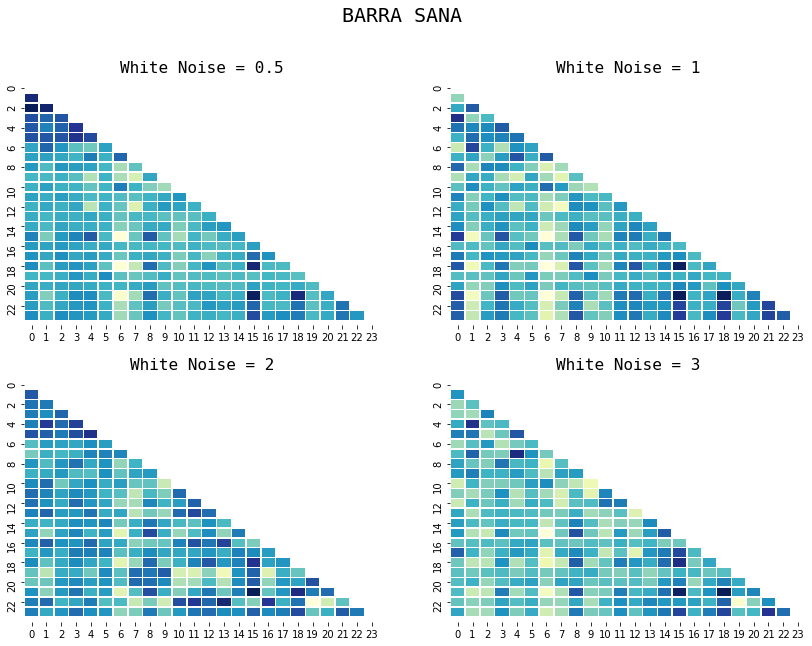

In [ ]:
graficar_corr_grupal(arreglo=arreglo_corr_grupal,
                     suptitle='BARRA SANA', 
                     estado=1,
                     font_title=font_title, 
                     cmap='YlGnBu')

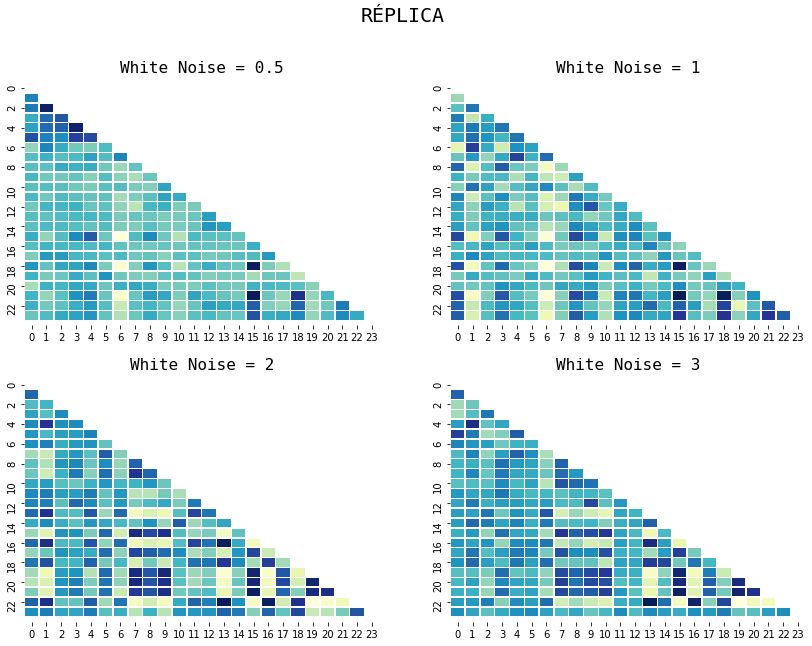

In [ ]:
graficar_corr_grupal(arreglo=arreglo_corr_grupal,
                     suptitle='RÉPLICA', 
                     estado=2,
                     font_title=font_title, 
                     cmap='YlGnBu')

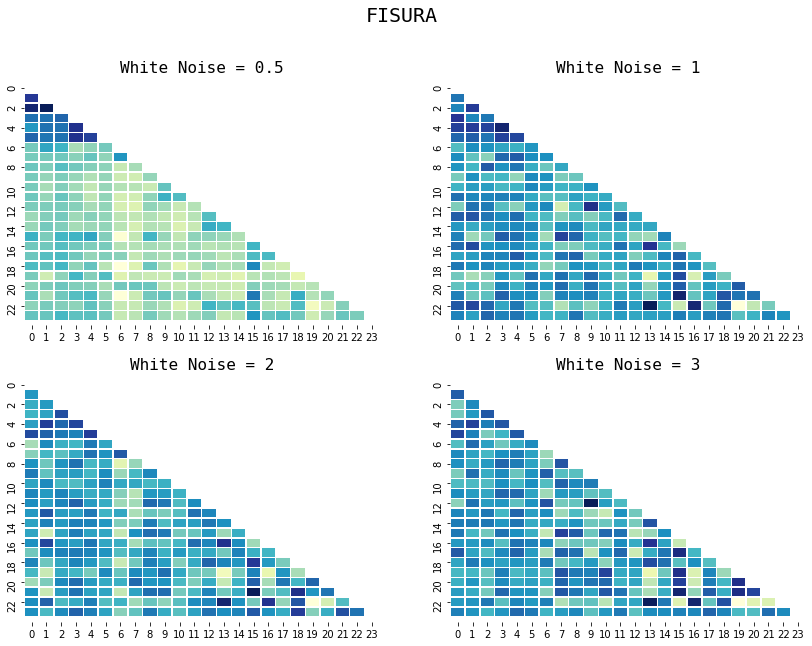

In [ ]:
graficar_corr_grupal(arreglo=arreglo_corr_grupal,
                     suptitle='FISURA', 
                     estado=3,
                     font_title=font_title, 
                     cmap='YlGnBu')

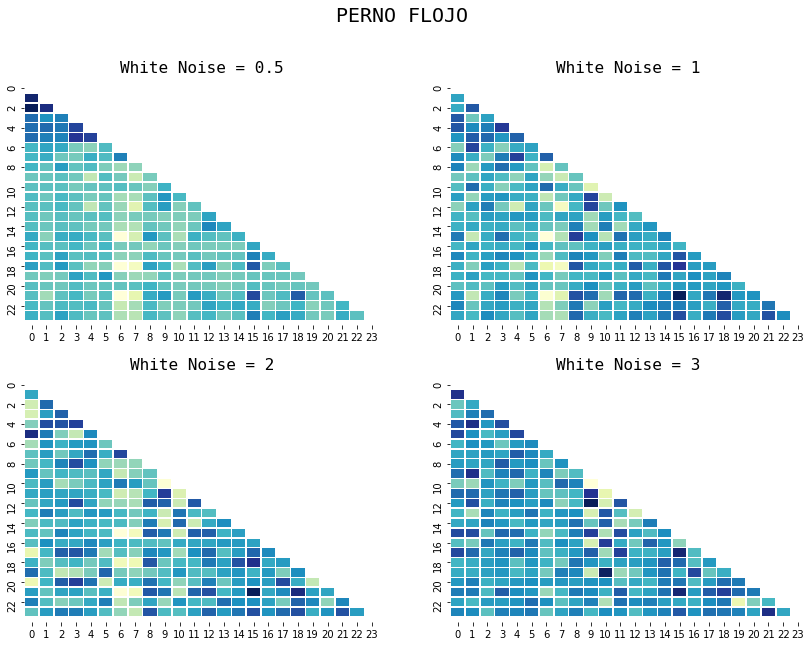

In [ ]:
graficar_corr_grupal(arreglo=arreglo_corr_grupal,
                     suptitle='PERNO FLOJO', 
                     estado=4,
                     font_title=font_title, 
                     cmap='YlGnBu')